# Inferential Statistics - Quantifying Uncertainty

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import pylab as py

Suppose a sample of 55 Texts, each one containing 400 tokens (file: Ex_1_posotiki - Results.csv)

In [63]:
file_path = "Ex_1_posotiki - Results.csv"
texts_results = pd.read_csv(file_path, sep='\t', decimal=",")
print("shape:\t", texts_results.shape)
texts_results.info()
texts_results.head()

shape:	 (55, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0                          55 non-null     object 
 1   Text                   55 non-null     object 
 2   Types                  55 non-null     int64  
 3   Tokens                 55 non-null     int64  
 4   Frequencies            55 non-null     object 
 5   TTR                    55 non-null     float64
 6   h-Point                55 non-null     float64
 7   Entropy                55 non-null     float64
 8   Average Tokens Length  55 non-null     float64
 9   R1                     55 non-null     float64
 10  Λ (Lambda)             55 non-null     float64
 11  Unnamed: 11            0 non-null      float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


,,Text,Types,Tokens,Frequencies,TTR,h-Point,Entropy,Average Tokens Length,R1,Λ (Lambda),Unnamed: 11
0,k_1.0,k_1.0,225,400,[...],0.562500,7.000000,7.162671,4.815000,0.821250,1.617990,NaN
1,k_2.0,k_2.0,227,394,[...],0.576142,6.666667,7.213779,4.563452,0.843204,1.578178,NaN
2,k_3.0,k_3.0,230,400,[...],0.575000,7.666667,7.240429,4.642500,0.855972,1.583049,NaN
3,k_4.0,k_4.0,233,396,[...],0.588384,8.333333,7.241439,4.646465,0.842733,1.594790,NaN
4,k_5.0,k_5.0,224,398,[...],0.562814,7.333333,7.209537,4.731156,0.831379,1.548756,NaN


Select three variables of the sample (TTR, Entropy, ATL)

In [38]:
texts_results_scores=texts_results.filter(regex='TTR$|Entr*|Av', axis=1)
print(texts_results_scores.shape)
texts_results_scores

(55, 3)


,TTR,Entropy,Average Tokens Length
0,0.562500,7.162671,4.815000
1,0.576142,7.213779,4.563452
2,0.575000,7.240429,4.642500
3,0.588384,7.241439,4.646465
4,0.562814,7.209537,4.731156
5,0.552500,7.185819,4.685000
6,0.590000,7.257533,4.885000
7,0.580000,7.250018,4.700000
8,0.532500,7.038712,4.672500
9,0.600000,7.396095,4.780000


Calculate basic statistics of these three variables

In [39]:
texts_results_scores.describe(include='all')

,TTR,Entropy,Average Tokens Length
count,55.000000,55.000000,55.000000
mean,0.573010,7.243281,4.772542
std,0.029192,0.124397,0.183400
min,0.527500,7.038712,4.457500
25%,0.552500,7.158491,4.678750
50%,0.565000,7.224080,4.731156
75%,0.589192,7.308582,4.861250
max,0.653944,7.572615,5.486005


From the results above we get an intuition about the mean values of the 3 indexes we are interested in for this specific sample.

mean_TTR: 0.57 Means that around 60% of the words in each subtext of this sample are unique! We talk about a quite high vocabulary richness.

mean_Entropy: 7.24 bits:There is a balanced distribution of word frequencies, indicating higher vocabulary diversity and unpredictability.

mean_ATL: 4.77: Around 5 characters per token in each subtext (observation) of the given sample.

# Independence Assumption in my sample

Για την διασφάλιση της τυχαιότητας κατά την συλλογή των datapoints στο δείγμα μου, χώρισα το κείμενο αυτό σε περίπου 55 επιμέρους κείμενα, καθένα από τα οποία περιείχε 400 λέξεις/tokens.Η διαίρεση πραγματοποιήθηκε επιλέγοντας διαδοχικά σημεία εκκίνησης μέσα στο κείμενο και εξάγοντας τις επόμενες 400 λέξεις. 
Η διασφάλιση της ανεξαρτησίας και της τυχαιότητας των παρατηρήσεων μέσα στο δείγμα είναι σημαντική για την αξιοπιστία των στατιστικών τεστ.
Εφόσον διαχειριζόμαστε συνεχή αριθμητικά δεδομένα,  το μέγεθος του δείγματος είναι μεγαλύτερο από 30 και διασφαλίσαμε ότι δεν παραβιάζεται η υπόθεση ανεξαρτησίας στο δείγμα μας, μπορορούμε να ισχυριστούμε ότι τα data μας ικανοποιούν τις προυποθέσεις του Central Limit Theorem.
Έτσι για το συγκεκριμένο dataset μπορούμε να πούμε ότι η δειγματική κατανομή των μέσων όρων για κάθε μεταβλητή θα τείνει προς την κανονική κατανομή (ανεξάρτητα με την υποκείμενη κατανομή).

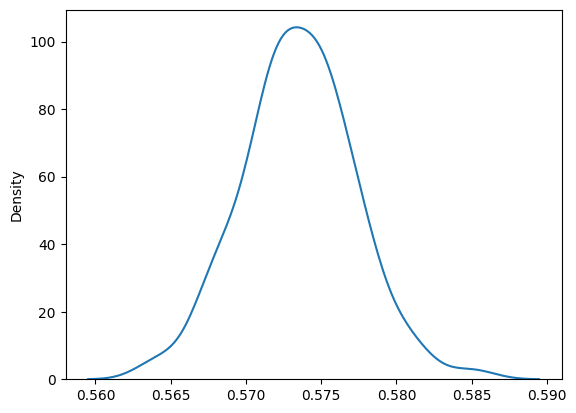

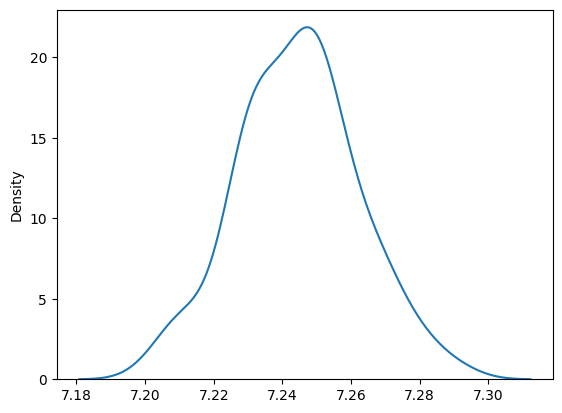

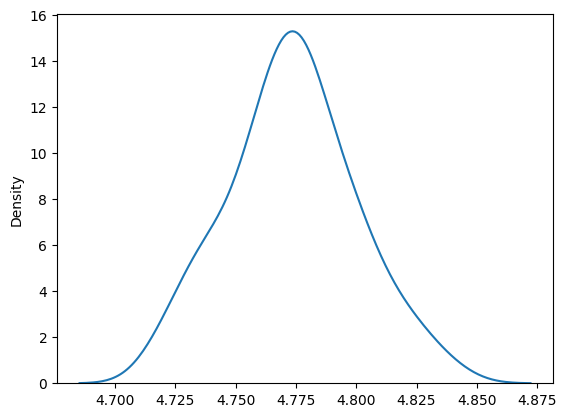

In [40]:
#Distributional properties of the mean for each index under repeated sampling
sampling=np.arange(100)
TTR=texts_results_scores['TTR']
Entropy=texts_results_scores['Entropy']
ATL=texts_results_scores['Average Tokens Length']
mean_list_TTR=[] 
mean_list_Entropy=[]
mean_list_ATL=[]
for i in sampling:
    #Select a sample of "size" points from each variable-index . replace=True, meaning that a value can be selected multiple times.
    items1 = np.random.choice(TTR, size=55, replace=True) 
    m1 = np.mean(items1)
    mean_list_TTR.append(m1)
    items2=np.random.choice(Entropy, size=55, replace=True) 
    m2 = np.mean(items2)
    mean_list_Entropy.append(m2)
    items3=np.random.choice(ATL, size=55, replace=True) 
    m3 = np.mean(items3)
    mean_list_ATL.append(m3)
    
sns.kdeplot(mean_list_TTR)
plt.show()
sns.kdeplot(mean_list_Entropy)
plt.show()
sns.kdeplot(mean_list_ATL)
plt.show()

# Normality Testing with The Kolmogorov-Smirnov Test 

We compare between some theoretical cumulative distribution function (CDF of the normal distribution, let's call it Ft(x)), and a samples’ cumulative distribution function , (let's call Fs(x)) . Precisely,

H0: Fs(x) is equal to Ft(x) for all x .

HA: Fs(x) is not equal to Ft(x) for at least one x

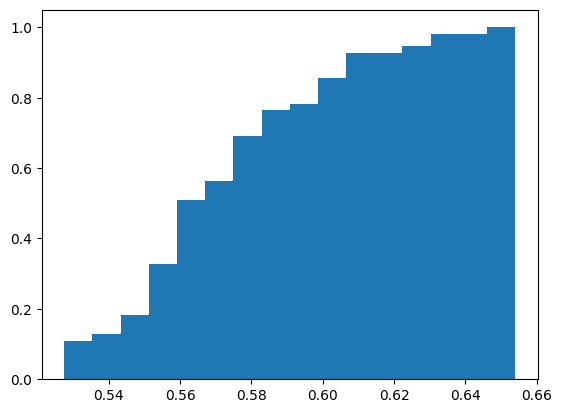

1.2266235909709129e-27
H0 can be rejected


In [41]:
plt.hist(TTR, bins=16, density=True, cumulative=True)
plt.show()

stat, pvalue = stats.kstest(TTR, "norm")
print(pvalue)

if pvalue < 0.05:
    print("H0 can be rejected")
else:
    print("H0 cannnot be rejected")

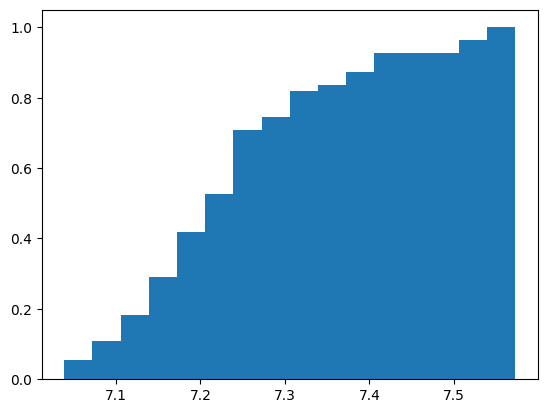

0.0
H0 can be rejected


In [42]:
plt.hist(Entropy, bins=16, density=True, cumulative=True)
plt.show()

stat, pvalue = stats.kstest(Entropy, "norm")
print(pvalue)

if pvalue < 0.05:
    print("H0 can be rejected")
else:
    print("H0 cannnot be rejected")

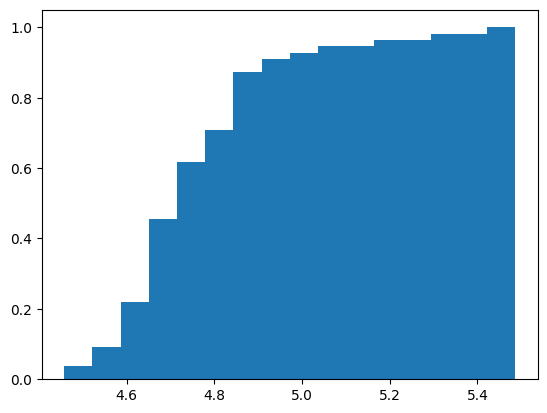

1.8661224725970412e-296
H0 can be rejected


In [43]:
plt.hist(ATL, bins=16, density=True, cumulative=True)
plt.show()

stat, pvalue = stats.kstest(ATL, "norm")
print(pvalue)

if pvalue < 0.05:
    print("H0 can be rejected")
else:
    print("H0 cannnot be rejected")

From the results above we observe that the normality assumption is being violated for all 3 variables. HOWEVER, as per theory, with large enough sample sizes (> 30 or 40), the violation of the normality assumption should not cause major problems ; this implies that we can use parametric procedures even when the data are not normally distributed. Since our sample is 55 we're good to go with a parametric test.

In [44]:
num_samples=len(texts_results_scores)  #sample size
print(num_samples)

55


In [64]:
# Οι μέσες τιμές των τριών δεικτών:
texts_results_scores.describe().loc['mean']

TTR                      0.573010
Entropy                  7.243281
Average Tokens Length    4.772542
Name: mean, dtype: float64

In [65]:
# Οι τυπικές αποκλίσεις των τριών δεικτών:
texts_results_scores.describe().loc['std']

TTR                      0.029192
Entropy                  0.124397
Average Tokens Length    0.183400
Name: std, dtype: float64

In [46]:
mean_TTR = texts_results_scores.describe().loc['mean', 'TTR']
print("Sample Mean TTR=",mean_TTR)
mean_Entropy = texts_results_scores.describe().loc['mean', 'Entropy']
print("Sample Mean Entropy=",mean_Entropy)
mean_ATL = texts_results_scores.describe().loc['mean', 'Average Tokens Length']
print("Sample Mean ATL=", mean_ATL)
std_TTR = texts_results_scores.describe().loc['std', 'TTR']
print("Sample Std TTR=", std_TTR)
std_Entropy = texts_results_scores.describe().loc['std', 'Entropy']
print("Sample Std Entropy=",std_Entropy)
std_ATL = texts_results_scores.describe().loc['std', 'Average Tokens Length']
print("Sample Std ATL=", std_ATL)

Sample Mean TTR= 0.5730097999999999
Sample Mean Entropy= 7.243280963636361
Sample Mean ATL= 4.772541799999999
Sample Std TTR= 0.029192469585430703
Sample Std Entropy= 0.12439678766082342
Sample Std ATL= 0.18340015016739275


# 1. Να εκτιμήσετε ένα διάσημα εμπιστοσύνης για τη μέση τιμή των ακόλουθων δεικτών: 
TTR, Entropy, και Average Token Length. 

Eπειδή δεν ξέρουμε την πληθυσμιακή τυπική απόκλιση (se), για τον υπολογισμό του Confidence Interval θα χρησιμοποιήσουμε την τυπική απόκλιση του δείγματος (s) και την κατανομή t του Student.Εφόσον το μέγεθος του δείγματός μας είναι μεγαλύτερο από 30 , δεν υπάρχει κάποια ουσιαστική διαφορά ανάμεσα στην στην t-κατανομή και την κανονική.

In [47]:
confidence_level = 0.99  # 99% confidence level
alpha = 1 - confidence_level  # Significance level
dof=num_samples  - 1
ci_TTR = st.t.interval(confidence_level, df=dof, loc=mean_TTR, scale=std_TTR/np.sqrt(num_samples))
ci_Entropy = st.t.interval(confidence_level, df=dof, loc=mean_Entropy, scale=std_Entropy/np.sqrt(num_samples))
ci_ATL = st.t.interval(confidence_level, df=dof, loc=mean_ATL, scale=std_ATL/np.sqrt(num_samples))

print("Confidence Interval (99%) for Mean TTR:", ci_TTR)
print("Confidence Interval (99%) for Mean Entropy:", ci_Entropy)
print("Confidence Interval (99%) for Mean ATL:", ci_ATL)

Confidence Interval (99%) for Mean TTR: (0.5624999073536965, 0.5835196926463033)
Confidence Interval (99%) for Mean Entropy: (7.198495547999147, 7.288066379273576)
Confidence Interval (99%) for Mean ATL: (4.7065139538825465, 4.838569646117452)


Confidence Interval 99% - What does it mean?

If you do repeated sampling and compute the confidnece interval each single time, then 99% of those confidence intervals will contain the true population mean (μ)


# 2α) Επιβεβαιώστε τα αποτελέσματα του ερωτήματος (1) για εφαρμόζοντας τα κατάλληλα tests. 

# TTR

Given an estimated CI for mean TTR (0.5624999073536965, 0.5835196926463033) we can verify these limits by conducting hypothesis
testing.
Since we proved based on the Central Limit Theorem that our sample data come from a normal distribution, we can conduct a parametric test.Parametric test for the mean is the t-test.
We formulate a null hypothesis H0 that the population mean TTR is a specific number.
HA (Alternative hypothesis): the population mean TTR is not the given specific number.
We choose this type of t-test (two-sided) in order to verify the limits of the acceptance region.
We formulate a non-directional alternative hypothesis, because we dont't know the outcome of our study.
We will conduct that test for mulitple h0-values,starting from the lower boundary towards the upper boundary.

In [48]:
from scipy.stats import ttest_1samp
h0valueS = [0.56,0.562,0.5625,0.563,0.58,0.583,0.5836,0.58352]
alpha = 0.01
TTR=texts_results_scores['TTR']
for h0 in h0valueS:
    tscore, pvalue = ttest_1samp(TTR, popmean=h0)
    if pvalue < alpha:
        print(f"For h0 ={h0} with p-value={pvalue} and t-statistic={tscore} I can reject H0, because the value falls in the rejection area")
    else:
        print(f"For h0={h0} with p-value={pvalue} and t-statistic={tscore} I cannot reject H0")

#p-value: Calculates the incompatibility of my data with the H0. Represents the probability of the H0 being true. If p<alpha,
#then I can believe the H0.
#t-score/t-value: a number that tells us how far away the sample mean is from thr hypothesis mean.
#The size of the t-value: The size is defined by the two tails of the distribution. The t-value defines the rejection area.
#alpha=significance level (0.01=very significant)

For h0 =0.56 with p-value=0.0016910193002750006 and t-statistic=3.3050735497064156 I can reject H0, because the value falls in the rejection area
For h0 =0.562 with p-value=0.007132592520756356 and t-statistic=2.796983717471261 I can reject H0, because the value falls in the rejection area
For h0=0.5625 with p-value=0.010000617651813431 and t-statistic=2.6699612594124864 I cannot reject H0
For h0=0.563 with p-value=0.013890776288608343 and t-statistic=2.542938801353712 I cannot reject H0
For h0=0.58 with p-value=0.08139651552771177 and t-statistic=-1.7758247726451017 I cannot reject H0
For h0=0.583 with p-value=0.0140680977416653 and t-statistic=-2.5379595209978336 I cannot reject H0
For h0 =0.5836 with p-value=0.009477556800816392 and t-statistic=-2.690386470668391 I can reject H0, because the value falls in the rejection area
For h0 =0.58352 with p-value=0.00999795119296389 and t-statistic=-2.670062877378993 I can reject H0, because the value falls in the rejection area


We work similarly for the rest 2 variables (Entropy, ATL)

# Entropy

In [49]:
from scipy.stats import ttest_1samp
h0valueS = [7.19,7.198,7.19849,7.1985,7.28,7.288,7.28806,7.2881]
alpha = 0.01
Entropy=texts_results_scores['Entropy']
for h0 in h0valueS:
    tscore, pvalue = ttest_1samp(Entropy, popmean=h0)
    if pvalue < alpha:
        print(f"For h0 ={h0} with p-value={pvalue} and t-statistic={tscore} I can reject H0,because the value falls in the rejection area")
    else:
        print(f"For h0={h0} with p-value={pvalue} and t-statistic={tscore} I cannot reject H0")


For h0 =7.19 with p-value=0.002465056645781772 and t-statistic=3.1764662845503846 I can reject H0,because the value falls in the rejection area
For h0 =7.198 with p-value=0.009251679015918333 and t-statistic=2.699528021011525 I can reject H0,because the value falls in the rejection area
For h0 =7.19849 with p-value=0.009991323813677842 and t-statistic=2.670315552369817 I can reject H0,because the value falls in the rejection area
For h0=7.1985 with p-value=0.010006967207018979 and t-statistic=2.669719379540363 I cannot reject H0
For h0=7.28 with p-value=0.03293289055995365 and t-statistic=-2.1890891802617722 I cannot reject H0
For h0=7.288 with p-value=0.010104342856028955 and t-statistic=-2.666027443800632 I cannot reject H0
For h0=7.28806 with p-value=0.010009984691354409 and t-statistic=-2.669604480777144 I cannot reject H0
For h0 =7.2881 with p-value=0.00994752810541183 and t-statistic=-2.671989172094854 I can reject H0,because the value falls in the rejection area


# Average Tokens Length


In [50]:
from scipy.stats import ttest_1samp
#Given an estimated CI for mean ATL (4.7065139538825465, 4.838569646117452) we can verify these limits by conducting hypothesis
#testing.
#We formulate a null hypothesis HO that the population mean ATL is a specific number.
# HA (Alternative hypothesis): the population mean ATL is not the given specific number.
#In order to verify the limits we will conduct that test for mulitple values as h0, starting from the lower boundary towards 
#the upper boundary.

h0valueS = [4.70,4.7065,4.70652,4.838,4.8385,4.8386]
alpha = 0.01
ATL=texts_results_scores['Average Tokens Length']
for h0 in h0valueS:
    tscore, pvalue = ttest_1samp(ATL, popmean=h0)
    if pvalue < alpha:
        print(f"For h0 ={h0} with p-value={pvalue} and t-statistic={tscore} I can reject H0,because the value falls in the rejection area")
    else:
        print(f"For h0={h0} with p-value={pvalue} and t-statistic={tscore} I cannot reject H0")


For h0 =4.7 with p-value=0.004911771829430976 and t-statistic=2.9333912045336903 I can reject H0,because the value falls in the rejection area
For h0 =4.7065 with p-value=0.009985202946910937 and t-statistic=2.6705490524300877 I can reject H0,because the value falls in the rejection area
For h0=4.70652 with p-value=0.010006417688252523 and t-statistic=2.6697403073466863 I cannot reject H0
For h0=4.838 with p-value=0.010621475947218907 and t-statistic=-2.646949870896685 I cannot reject H0
For h0=4.8385 with p-value=0.010074155089342231 and t-statistic=-2.667168497981567 I cannot reject H0
For h0 =4.8386 with p-value=0.009967837593296386 and t-statistic=-2.671212223398536 I can reject H0,because the value falls in the rejection area


# 2β) Παρουσιάστε 2 ενδεικτικά διαγράμματα που αναπαριστούν γραφικά ένα αποτέλεσμα απόρριψης και ένα αποτέλεσμα μη απόρριψης της NULL Hypothesis. 

Taking 2 representative examples from the Entropy variable

t-statistic: -2.671989172094854
P Value:  0.00994752810541183
can reject H0


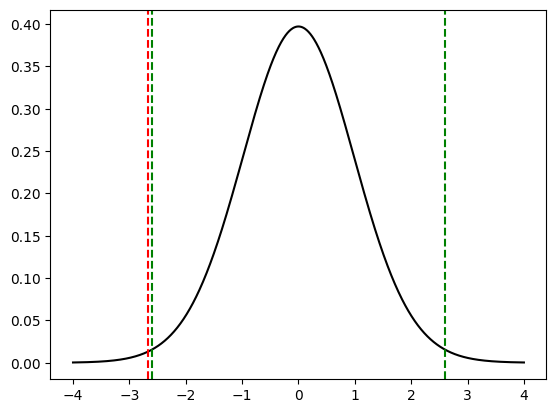

In [51]:
rejected=7.2881
alpha = 0.01
t_crit = 2.607 #from t-table for dof=99 and a = 0.01 two-tailed (i.e. CL=0.95, i.e. 0.025 each side)
tscore, pvalue = ttest_1samp(Entropy, popmean=rejected)
print("t-statistic:", tscore)
print("P Value: ", pvalue)
plt.figure()
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")
plt.axvline(x=tscore, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')
plt.axvline(x=-t_crit, color='g', linestyle= '--')

if pvalue < alpha:
    print("can reject H0")
else:
    print("cannot reject H0")

    

We use PDF(Probability Density Function) because we have continuous random variables. The purpose of PDF curve is to allow you to compute the probability of observing some value between some range.

t-statistic: -2.1890891802617722
P Value:  0.03293289055995365
cannot reject H0


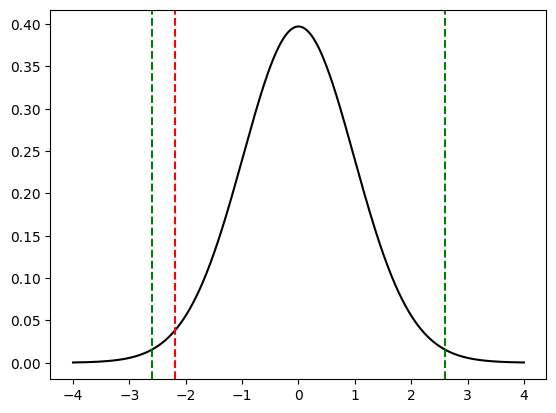

In [52]:
accepted=7.28
alpha = 0.01
t_crit = 2.607 #from t-table for dof=99 and a = 0.01 two-tailed (i.e. CL=0.95, i.e. 0.025 each side)
tscore, pvalue = ttest_1samp(Entropy, popmean=accepted)
print("t-statistic:", tscore)
print("P Value: ", pvalue)
plt.figure()
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")
plt.axvline(x=tscore, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')
plt.axvline(x=-t_crit, color='g', linestyle= '--')

if pvalue < alpha:
    print("can reject H0")
else:
    print("cannot reject H0")
    

# 3.Συνεργαστείτε με μια άλλη ομάδα που έχει επιλέξει διαφορετικό κείμενο κατά την 1η εργασία έτσι ώστε να σας είναι διαθέσιμα τα αποτελέσματά της από το QUITA. Ελέγξτε αν οι μέσες τιμές των δεικτών TTR, Entropy, και Average Token Length διαφέρουν (στατιστικά) σημαντικά.Θεωρείστε ότι τα δείγματα είναι ανεξάρτητα. (Ως δείγμα 1 θεωρείστε τα δικά σας αποτελέσματα και ως δείγμα 2 τα αποτελέσματα της άλλης ομάδας).

In [53]:
sample_2 = "Multiple_Text_Project_AK_-_Results.csv"
sample_2_results = pd.read_csv(sample_2, sep='\t', decimal=",")
print("shape:\t", sample_2_results.shape)
sample_2_results.head()

shape:	 (51, 12)


,,Text,Types,Tokens,Frequencies,TTR,h-Point,Entropy,Average Tokens Length,R1,Λ (Lambda),Unnamed: 11
0,Dihghmata tou Mixalh Katrakh1.0,Dihghmata tou Mixalh Katrakh1.0,564,1000,[...],0.564,11.333333,8.391477,5.145,0.855222,1.758203,NaN
1,Dihghmata tou Mixalh Katrakh2.0,Dihghmata tou Mixalh Katrakh2.0,513,1000,[...],0.513,11.500000,8.209780,4.999,0.839125,1.618026,NaN
2,Dihghmata tou Mixalh Katrakh3.0,Dihghmata tou Mixalh Katrakh3.0,494,1000,[...],0.494,12.000000,8.045077,5.173,0.814000,1.554350,NaN
3,Dihghmata tou Mixalh Katrakh4.0,Dihghmata tou Mixalh Katrakh4.0,529,1000,[...],0.529,11.000000,8.171305,5.118,0.821500,1.664559,NaN
4,Dihghmata tou Mixalh Katrakh5.0,Dihghmata tou Mixalh Katrakh5.0,529,1000,[...],0.529,11.500000,8.182369,4.967,0.825125,1.671679,NaN


In [66]:
keys = sample_2_results.keys() 
print(keys)
keys[1]
sample_2_results.drop([keys[0],keys[4], keys[-1]], axis='columns', inplace=True)
print(sample_2_results.shape)
sample_2_results.head()

Index(['Text', 'Types', 'Tokens', 'TTR', 'h-Point', 'Entropy',
       'Average Tokens Length', 'R1', 'Λ (Lambda)'],
      dtype='object')
(51, 6)


,Types,Tokens,TTR,Entropy,Average Tokens Length,R1
0,564,1000,0.564,8.391477,5.145,0.855222
1,513,1000,0.513,8.209780,4.999,0.839125
2,494,1000,0.494,8.045077,5.173,0.814000
3,529,1000,0.529,8.171305,5.118,0.821500
4,529,1000,0.529,8.182369,4.967,0.825125


In [55]:
sample_1_results_scores=texts_results_scores
sample_2_results_scores=sample_2_results.filter(regex='TTR$|Entr*|Av', axis=1)
print(sample_2_results_scores.shape)
sample_2_results_scores

(51, 3)


,TTR,Entropy,Average Tokens Length
0,0.564000,8.391477,5.145000
1,0.513000,8.209780,4.999000
2,0.494000,8.045077,5.173000
3,0.529000,8.171305,5.118000
4,0.529000,8.182369,4.967000
5,0.511000,8.080454,4.812000
6,0.508000,8.128525,4.920000
7,0.532000,8.145439,5.084000
8,0.455000,7.941117,4.623000
9,0.483000,7.977329,4.862000


In [56]:
sample_2_results_scores.describe(include='all')

,TTR,Entropy,Average Tokens Length
count,51.000000,51.000000,51.000000
mean,0.492013,8.041468,4.770792
std,0.028866,0.129331,0.187865
min,0.418000,7.718872,4.327000
25%,0.472500,7.959401,4.648500
50%,0.491000,8.034059,4.780000
75%,0.512500,8.139194,4.872000
max,0.564000,8.391477,5.173000


# Hypothesis testing for the difference of the means of 2 independent populations (t-test)

I want to test,whether 2 independent groups differ significantly in a continuous measure (in our case: the mean), that's why I use the unpaired t-test.
Scipy offers the function 'ttest_ind', which is a "test for the null hypothesis that 2 independent samples have
identical average (mean) values."


Before we proceed in t-test, we have to check:
1)Normality (with Kolmogorov-Smirnov)
2)Equality of variances of the two samples

1)We proved normality for the group_1, so we could repeat for group 2. But since we see that the sample size is >30, whatever the result of the Kolmogorov-Smirnov test, we can assume the sampling distribution of the means for each index in the group2 also tends towards normality (as per CLT).
2)Var_test: with Bartlett’s test for equal variances.

In [61]:
from scipy.stats import bartlett
indexes = list(sample_2_results_scores.columns)
print(column_name_vars)
for i in indexes:
    stat, p = bartlett(sample_1_results_scores[i],sample_2_results_scores[i])
    print(f"p-value for {i}:",p)

['TTR', 'Entropy', 'Average Tokens Length']
p-value for TTR: 0.9358068749193957
p-value for Entropy: 0.780183386231624
p-value for Average Tokens Length: 0.8630114007729807


The very high p-value suggests that the 2 populations do have equal variances. So we can go ahead and perform unpaired student t-test.

h0: μ=0 :the difference of the means of the independent groups is 0, so the means of the two samples are comparable.

h1: μ !=0 : the differnece of the means is not 0, so the means are not comparable for two groups

Perform unpaired two-sample t-test for each index

In [57]:
from scipy.stats import ttest_ind
ttest_TTR = ttest_ind(sample_1_results_scores['TTR'], sample_2_results_scores['TTR'])
ttest_Entropy = ttest_ind(sample_1_results_scores['Entropy'], sample_2_results_scores['Entropy'])
ttest_ATL = ttest_ind(sample_1_results_scores['Average Tokens Length'], sample_2_results_scores['Average Tokens Length'])

alpha=0.01 #(significance level)
#Significant doesn't mean important. Means that given this sample, the differences are not likely to have resulted by chance.

if ttest_TTR.pvalue < alpha:
    
    print("Reject H0 for TTR. The means are significantly different.The differnece of the means is not  random")
else:
    print("Fail to reject H0 for TTR. The means are not significantly different.")
print("pvalue:",ttest_TTR.pvalue)
if ttest_Entropy.pvalue < alpha:
    
    print("Reject H0 for Entropy. The means are significantly different.")
else:
    print("Fail to reject H0 for Entropy. The means are not significantly different.")
print("pvalue:",ttest_Entropy.pvalue)
if ttest_ATL.pvalue < alpha:
    
    print("Reject H0 for ATL. The means are significantly different.")
else:
    print("Fail to reject H0 for ATL. The means are not significantly different")
print("pvalue:",ttest_ATL.pvalue)


Reject H0 for TTR. The means are significantly different.
pvalue: 2.09075388909136e-26
Reject H0 for Entropy. The means are significantly different.
pvalue: 3.8841598795369655e-56
Fail to reject H0 for ATL. The means are not significantly different
pvalue: 0.9614036554060204


Based on the above results:
1)The mean TTR and Entropy values of the two independent samples are not comparable.There is a highly significant difference between the means of these indexes in the 2 samples. Going deeper into the data...
this means that the difference in vocabulary richness in the 2 texts of each sample is not random.
2)The mean ATL values of the two independent samples are comparable. Means that the texts of the two samples consist of tokens, whose length is approximately the same (~5 characters per token)